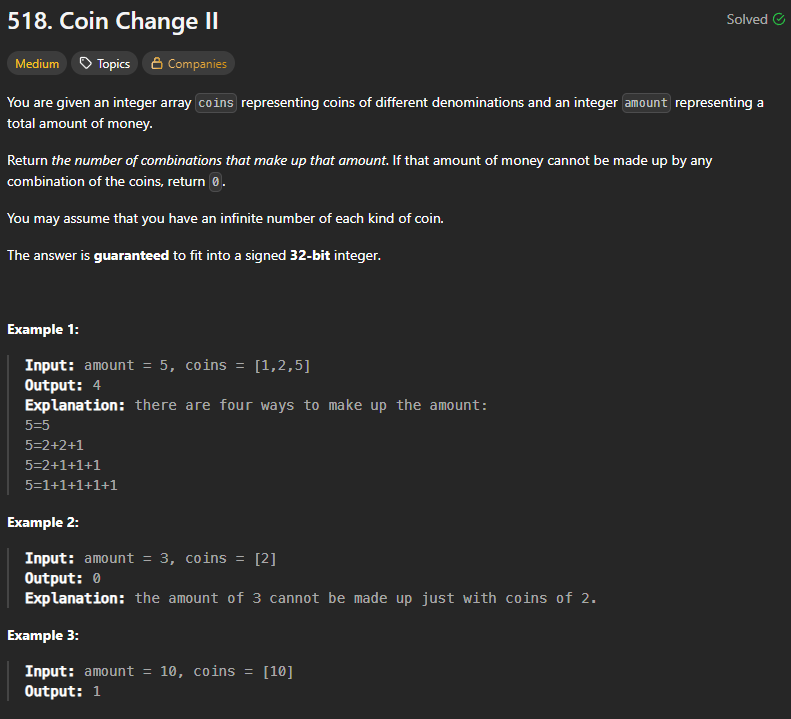

## Formula

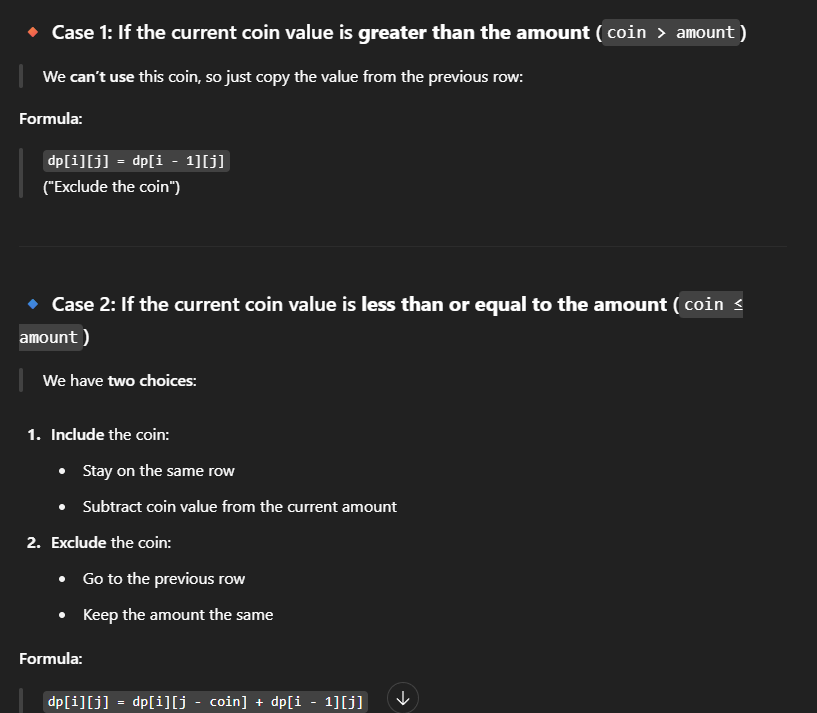

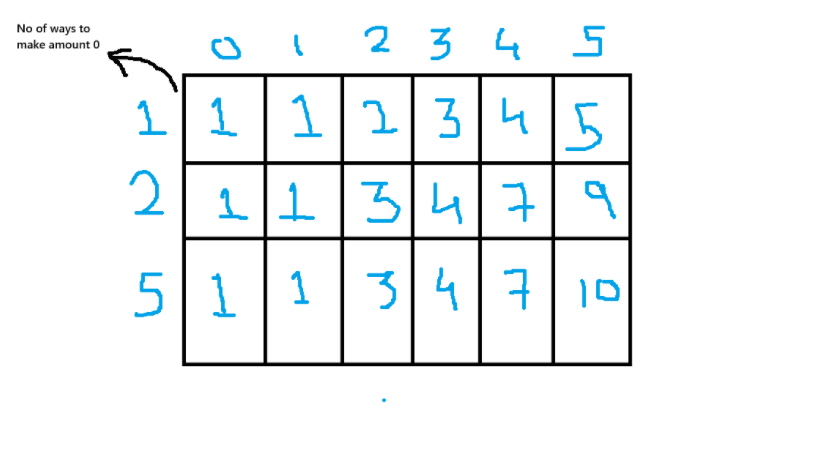

### Dynamic Programming - 1D

In [ ]:
class Solution:
    def change(self, amount: int, coins: List[int]) -> int:
        # dp[j] = number of combinations to make amount j
        dp = [0] * (amount + 1)
        dp[0] = 1  # There's 1 way to make amount 0 (use no coins)

        for coin in coins:
            for j in range(coin, amount + 1):
                dp[j] += dp[j - coin]

        return dp[amount]

#### Dynamic Programming - 2D

In [ ]:
from typing import List

class Solution:
    def change(self, amount: int, coins: List[int]) -> int:
        n = len(coins)
        # dp[i][j] = number of ways to make amount j using first i+1 coins
        dp = [[0] * (amount + 1) for _ in range(n)]

        # Base case: amount 0 can always be made with 1 way (no coins)
        for i in range(n):
            dp[i][0] = 1

        # Fill the first row (only using the first coin)
        for j in range(coins[0], amount + 1):
            if j % coins[0] == 0:
                dp[0][j] = 1

        # Fill the rest of the table
        for i in range(1, n):
            for j in range(amount + 1):
                if j < coins[i]:
                    # Can't include current coin
                    dp[i][j] = dp[i - 1][j]
                else:
                    # Include + Exclude
                    dp[i][j] = dp[i][j - coins[i]] + dp[i - 1][j]

        return dp[n - 1][amount]

### Recursion

In [ ]:
class Solution:
    def change(self, amount: int, coins: List[int]) -> int:
        def helper(i=0, remaining_amount=amount):
            # Base cases
            if remaining_amount == 0:
                return 1
            if remaining_amount < 0 or i == len(coins):
                return 0

            # Include the coin (stay at same index)
            include = helper(i, remaining_amount - coins[i])

            # Exclude the coin (move to next index)
            exclude = helper(i + 1, remaining_amount)

            return include + exclude

        return helper(0)

### Memoization

In [ ]:
class Solution:
    def change(self, amount: int, coins: List[int]) -> int:
        memo = {}

        def helper(i=0, remaining_amount=amount):
            # Check memo
            if (i, remaining_amount) in memo:
                return memo[(i, remaining_amount)]

            # Base cases
            if remaining_amount == 0:
                return 1
            if remaining_amount < 0 or i == len(coins):
                return 0

            # Include the coin (stay at same index)
            include = helper(i, remaining_amount - coins[i])

            # Exclude the coin (move to next index)
            exclude = helper(i + 1, remaining_amount)

            memo[(i, remaining_amount)] = include + exclude
            return memo[(i, remaining_amount)]

        return helper(0)